In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df_test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [3]:
print("Teste - primeiras linhas:")
print(df_test.head())

# Verificando informações sobre o dataset
print("\nInformações do Dataset de Teste:")
print(df_test.info())

# Descrição estatística das colunas numéricas
print("\nDescrição estatística do Dataset de Teste:")
print(df_test.describe())

# Verificando se há valores ausentes
print("\nVerificando valores ausentes no Dataset de Teste:")
print(df_test.isnull().sum())

Teste - primeiras linhas:
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     

In [4]:
print("Treinamento - primeiras linhas:")
print(df_train.head())

# Verificando informações sobre o dataset
print("\nInformações do Dataset de Treinamento:")
print(df_train.info())

# Descrição estatística das colunas numéricas
print("\nDescrição estatística do Dataset de Treinamento:")
print(df_train.describe())

# Verificando se há valores ausentes
print("\nVerificando valores ausentes no Dataset de Treinamento:")
print(df_train.isnull().sum())

Treinamento - primeiras linhas:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   thr

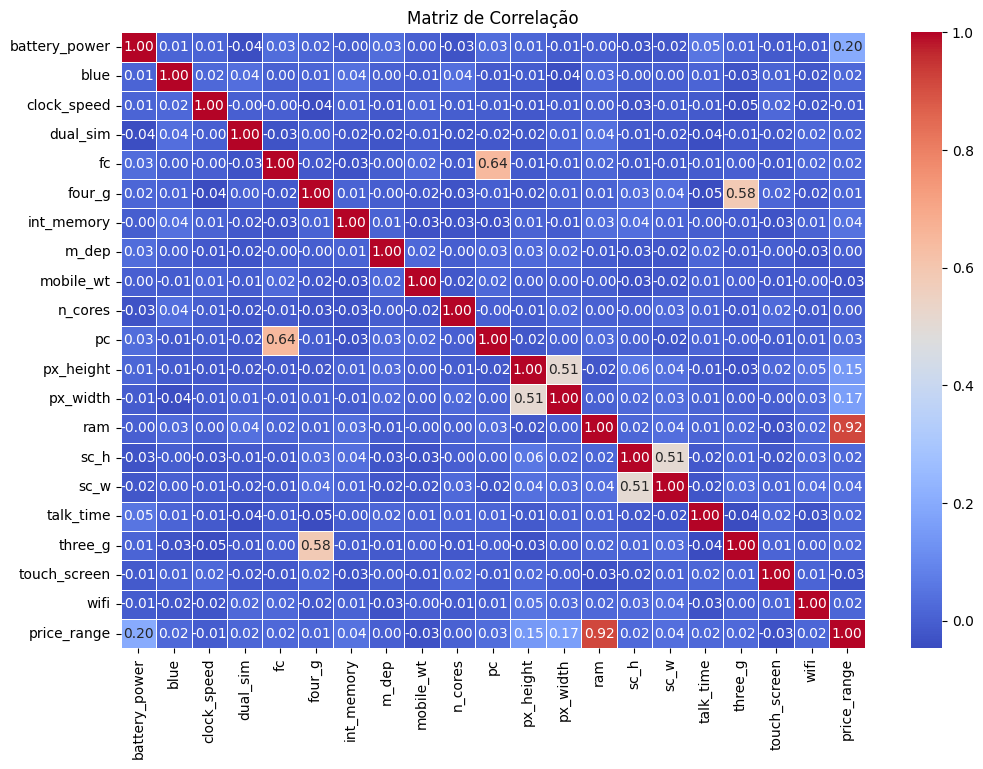

In [5]:
# Analisando a correlação entre as variáveis
corr_matrix = df_train.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


# ML

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [7]:
# Separando as variáveis independentes (X) da variável dependente (y)
X = df_train.drop(columns=['price_range'])  # As características
y = df_train['price_range']  # A faixa de preço

In [8]:
# Dividindo os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pipeline_dtc = Pipeline([
    ('scaler', StandardScaler()),  # Escalonamento dos dados
    ('model', DecisionTreeClassifier(random_state=42))  # Modelo Decision Tree
])

In [10]:
# Treinando o modelo com o pipeline
pipeline_dtc.fit(X_train, y_train)

# Fazendo previsões
y_pred = pipeline_dtc.predict(X_val)

# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_val, y_pred))
print("Relatório de Classificação do modelo:")
print(classification_report(y_val, y_pred))

Acurácia do modelo: 0.835
Relatório de Classificação do modelo:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.71      0.75        92
           3       0.87      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [11]:
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),  # Escalonamento dos dados
    ('model', RandomForestClassifier(random_state=42))  # Modelo Random Forest Classifier
])

In [12]:
# Treinando o modelo com o pipeline
pipeline_rfc.fit(X_train, y_train)

# Fazendo previsões
y_pred = pipeline_rfc.predict(X_val)

# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_val, y_pred))
print("Relatório de Classificação do modelo:")
print(classification_report(y_val, y_pred))

Acurácia do modelo: 0.8925
Relatório de Classificação do modelo:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



# Dataset de Teste

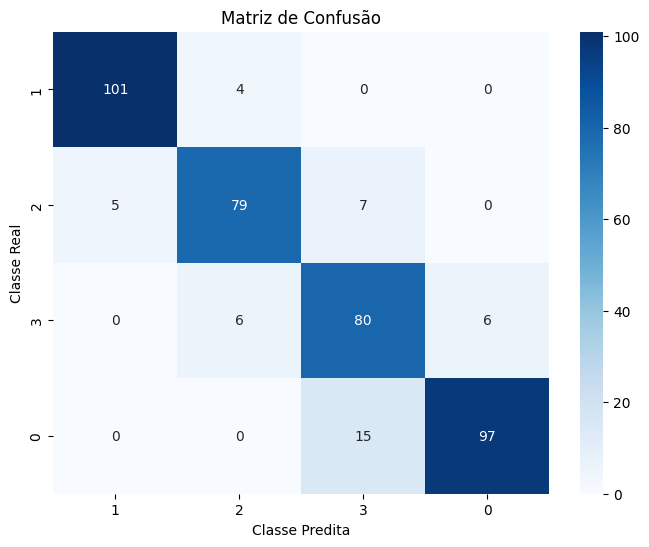

In [13]:
X_test = df_test.drop(columns=['id'])

# Fazendo previsões usando o modelo treinado
y_test_pred = pipeline_rfc.predict(X_test)

# Adicionando as previsões ao dataset de teste
df_test['predicted_price_range'] = y_test_pred

# Gerando a matriz de confusão
cm = confusion_matrix(y_val, y_pred)

# Visualizando com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()